In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
data=pd.read_csv('mediansexfig.csv',header=None)

In [3]:
err=pd.read_csv('sdexfig.csv',header=None)

In [9]:
err

0         1
0   0.149624  6.586756
1   0.159584  6.176428
2   0.169726  5.590645
3   0.179670  5.285582
4   0.189905  5.103298
5   0.199817  5.002916
6   0.209805  4.411300
7   0.219876  4.287511
8   0.229945  4.175419
9   0.239857  4.080885
10  0.249774  3.945416

In [10]:
x = data[0]
y = data[1]
sig=err[1]-data[1]
params1 = np.array([1])
params2 = np.array([1,1])


def func1(x, a):
    return a/x

def func2(x, a, b):
    return b*x/2 + a/x

pop1,pcov1 = curve_fit(func1, x, y, params1,sig)
pop2,pcov2 = curve_fit(func2, x, y, params2,sig)

In [11]:
pop1,pop2

(array([0.89821304]), array([0.81705687, 3.45968669]))

In [12]:
np.sqrt(np.diag(pcov1)),np.sqrt(np.diag(pcov2))

(array([0.00734278]), array([0.01864138, 0.77314905]))

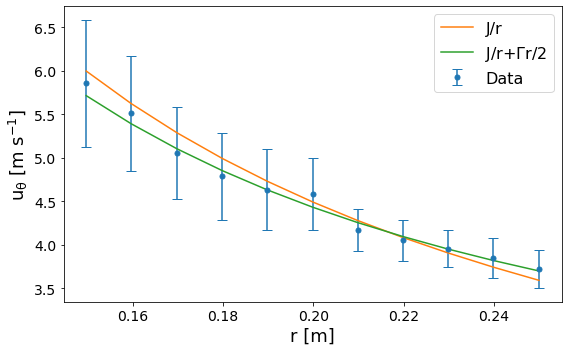

In [14]:
fig=plt.figure(figsize=(8,5))
plt.errorbar(x,y,sig,fmt='.',ms=10,capsize=5,label='Data')
plt.plot(x,func1(x,pop1),label='J/r')
plt.plot(x,func2(x,pop2[0],pop2[1]),label='J/r+$\Gamma$r/2')



plt.xlabel('r [m]',fontsize=18)
plt.ylabel(r'u$_{\rm \theta}$ [m s$^{-1}$]',fontsize=18)
plt.gca().tick_params(labelsize=14)
plt.legend(fontsize=16)

plt.tight_layout()
plt.savefig('exp_vtheta1.png')

In [15]:
sum(abs(y-func1(x,pop1))**2/sig**2)

1.3631092411689534

In [16]:
sum(abs(y-func2(x,pop2[0],pop2[1]))**2/sig**2)

0.42268663600288375

In [17]:
pop1,pop2

(array([0.89821304]), array([0.81705687, 3.45968669]))

In [32]:
cs=346/np.sqrt(7/5)
r1=0.07
r2=0.3
j=pop2[0]/(cs*r1)
bigr=x/r1
g=pop2[1]*r1/cs
d=0.1087
H=0.6
x1=(d/(2*np.pi*r1*H*cs))**2
b=x1-np.log(x1)+j**2-(g/2)**2

r16=(-(j/bigr)**2+2*(j*g+1)*np.log(bigr)+(g*bigr/2)**2)+b

In [33]:
def f(r,x):
    return ((2/r)*((j/r + g*r/2)**2+1)/(1-1/x))

In [34]:
def rk4(x, h, y, f):
    k1 = f(x, y)
    k2 = f(x + 0.5*h, y + 0.5*h*k1)
    k3 = f(x + 0.5*h, y + 0.5*h*k2)
    k4 = f(x + h, y + h*k3)
    return y + h*(k1 + 2*(k2 + k3) + k4)/6.0

In [35]:
N=100
xh=x1
rmin=1
rmax=r2/r1
dr=(rmax-rmin)/N
vr=np.zeros(N)
rh=np.zeros(N)

for i in range(N):
    r=rmin+i*dr
    xh=rk4(r,dr,xh,f)
    #print(np.sqrt(xh))
    rh[i]=(r*r1)
    vr[i]=cs*xh**0.5

In [36]:
sigl=np.array([np.sqrt(np.sqrt(np.diag(pcov2))[0]**2+np.sqrt(np.diag(pcov2))[1]**2)]*len(rh))



In [37]:
lam1,lamcov1 = curve_fit(func1, rh, -vr, params1,sigl)

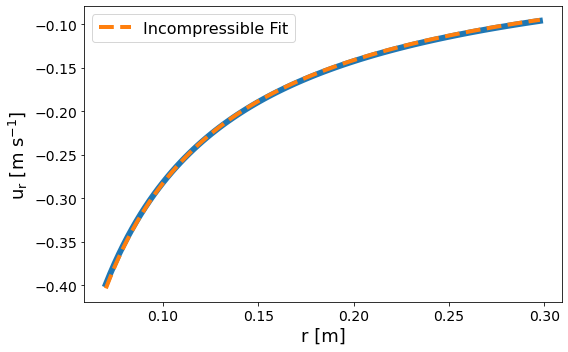

In [38]:
fig=plt.figure(figsize=(8,5))
plt.plot(rh,-vr,linewidth=6)
plt.plot(rh,lam1[0]/rh,linestyle='dashed',linewidth=4,label='Incompressible Fit')

plt.xlabel('r [m]',fontsize=18)
plt.ylabel(r'u$_{\rm r}$ [m s$^{-1}$]',fontsize=18)
plt.gca().tick_params(labelsize=14)
plt.legend(fontsize=16)

plt.tight_layout()
plt.savefig('exp_vr1.png')

In [39]:
lam1,np.sqrt(np.diag(pcov1))

(array([-0.0282409]), array([0.00734278]))

In [40]:
sum(abs(-vr-func1(rh,lam1))**2/sigl**2)

0.0003216170651144234

In [31]:
sigl

array([0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337375,
       0.77337375, 0.77337375, 0.77337375, 0.77337375, 0.77337